<span style=" font-family: Arial; font-size: 2em;"> Advanced Linear Regression Assigment: Surprise Housing</span>

by Barkha Saxena

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 190)
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# File paths
housing_data_fpath= "train.csv"
housing_data_dict_fpath= "data description.txt"

In [4]:
# Importing CarPrice_Assignment.csv
housing_df_raw = pd.read_csv(housing_data_fpath)

# Creating a copy for analysis
housing_df = housing_df_raw.copy()

In [5]:
# Checking first 5 rows of car_df
housing_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [6]:
nrows, ncols = housing_df.shape
print(f"Housing price data has {nrows} rows and {ncols} columns")

Housing price data has 1460 rows and 81 columns


In [7]:
# Checking for missing values and data type
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<b> Note: </b>As can be observed, 
1. there are missing values in the data
2. MSSubClass is a categorical variable which is read as integer, but as it is an ordinal categorical variable leavingg it as it is
3. checking with the data dict, there are some ordinal categorical variables like:

    -BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement



    -BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement



    - LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular


    - LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression


    - BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
       

       
    - HouseStyle: Style of dwelling - seems like a ordinal categorical variable
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
       
<b> Basically all the ratings and quality classes are ordinal categroical variables: </b>

'MSSubClass', 'LotShape','LandContour','LandSlope','ExterQual','ExterCond',
'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC',

<b>Nominal categorical variables: </b>
'MSZoning','Street','Alley','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition', 

MiscVal - integer values in dollar is correctly read as int

In [8]:
# Checking % of Missing values by each column
round(housing_df.isnull().sum()/len(housing_df)*100,2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

<b>Columns</b>: PoolQC, MiscFeature,Alley,Fence have more than 80% missing values.Hence dropping them

In [9]:
housing_df.drop(['PoolQC', 'MiscFeature','Alley','Fence'], axis=1, inplace=True)

In [10]:
nrows, ncols = housing_df.shape
print(f"Now, after dropping the columns, housing price data has {nrows} rows and {ncols} columns")

Now, after dropping the columns, housing price data has 1460 rows and 77 columns


In [11]:
# analysing FireplaceQuality
round(housing_df.FireplaceQu.value_counts()/(housing_df.FireplaceQu.count())*100,2)

Gd    49.35
TA    40.65
Fa     4.29
Ex     3.12
Po     2.60
Name: FireplaceQu, dtype: float64

From the data dictionary, TA represents average quality and Gd reperesents good. As around 90% data present here represent good or average, there is not much variation to study.

In [12]:
# analysing LotFrontage
print(housing_df.LotFrontage.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99]))
housing_df.LotFrontage.unique()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64


array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

It is a continuous variable with around 50% missing data. This variable represents Linear feet of street connected to property.
the sudden jump of value from 141 to 313 at 99 percentiles indicates presence of outliers. We can impute missing values with 
the median.

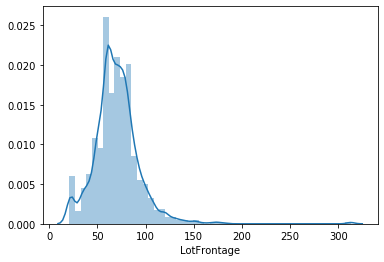

In [13]:
sns.distplot(housing_df["LotFrontage"])

In [14]:
# imputing missing values with median( not using mean due to presence of  outliers)
housing_df.loc[:,"LotFrontage"] = housing_df[["LotFrontage"]].apply(lambda x: x.fillna(x.median()))

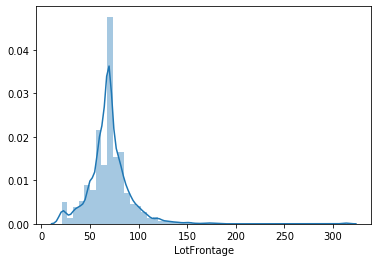

In [15]:
sns.distplot(housing_df["LotFrontage"])

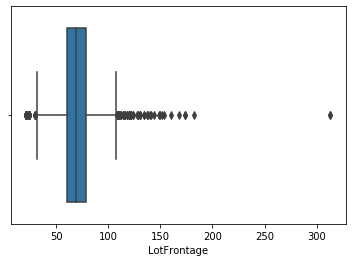

In [16]:
sns.boxplot(housing_df["LotFrontage"])

After imputing the distribution almost reamined the same with the peak spiking more. 

In [17]:
housing_df.drop(['FireplaceQu','LotFrontage'], axis=1, inplace=True)

In [18]:
nrows, ncols = housing_df.shape
print(f"Now, after dropping the columns, housing price data has {nrows} rows and {ncols} columns")

Now, after dropping the columns, housing price data has 1460 rows and 75 columns


In [19]:
housing_df.nunique().sort_values() 

Street              2
Utilities           2
CentralAir          2
PavedDrive          3
HalfBath            3
LandSlope           3
BsmtHalfBath        3
GarageFinish        3
KitchenQual         4
FullBath            4
KitchenAbvGr        4
MasVnrType          4
Fireplaces          4
BsmtFullBath        4
BsmtQual            4
LandContour         4
LotShape            4
BsmtCond            4
BsmtExposure        4
ExterQual           4
ExterCond           5
HeatingQC           5
YrSold              5
BldgType            5
GarageCars          5
GarageQual          5
LotConfig           5
GarageCond          5
MSZoning            5
Electrical          5
SaleCondition       6
GarageType          6
Heating             6
BsmtFinType2        6
BsmtFinType1        6
Foundation          6
RoofStyle           6
Functional          7
RoofMatl            8
HouseStyle          8
BedroomAbvGr        8
Condition2          8
PoolArea            8
OverallCond         9
Condition1          9
SaleType  

In [20]:
# Analysing the distributions of numerical variable
housing_df.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Id,1460.0,730.500000,421.610009,1.0,146.9,365.75,730.5,1095.25,1314.1,1445.41,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,20.00,50.0,70.00,120.0,190.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,5000.0,7553.50,9478.5,11601.50,14381.7,37567.64,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,5.00,6.0,7.00,8.0,10.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.00,5.0,6.00,7.0,9.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1924.9,1954.00,1973.0,2000.00,2006.0,2009.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1950.0,1967.00,1994.0,2004.00,2006.0,2009.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.00,0.0,166.00,335.0,791.92,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,0.00,383.5,712.25,1065.5,1572.41,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.00,0.0,0.00,117.2,830.38,1474.0


<b> Note: </b> Observations regarding the distribution of numerical variables from (nunique() and describe())
1. ID: all rows have unique values. NOT USEFUL for our analysis.


In [21]:
# car_ID has non- null 205 unique values => primary key
duplicateRowsDF = housing_df[housing_df.duplicated('Id',keep=False)]
print("All Duplicate Rows based on primary key ID column are : "+str( len(duplicateRowsDF)))

All Duplicate Rows based on primary key ID column are : 0


In [22]:
# drop null values row wise
housing_df = housing_df.dropna(how='any',axis=0)
housing_df.shape

(1338, 75)

In [23]:
housing_df.drop(['Id'], axis=1, inplace=True)

# Studying target variable

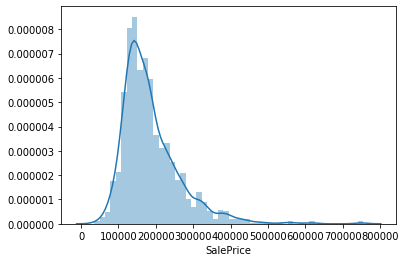

In [24]:
sns.distplot(housing_df["SalePrice"],bins = 50)

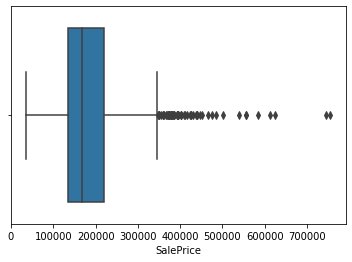

In [25]:
sns.boxplot(housing_df["SalePrice"])

In [26]:
housing_df["SalePrice"].describe(percentiles = [0.10,0.25,0.30,0.50,0.75,0.80,0.85,0.90,0.91,0.92,0.95,0.99,0.998])

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
10%      113000.000000
25%      135000.000000
30%      140000.000000
50%      168500.000000
75%      220000.000000
80%      235000.000000
85%      256135.000000
90%      283624.100000
91%      290000.000000
92%      305904.000000
95%      335000.000000
99%      443944.430000
99.8%    616006.818000
max      755000.000000
Name: SalePrice, dtype: float64

<b> Note: </b>:
- The plot seemed to be left-skewed, meaning that the most prices in the dataset are low(Below 20,000).

- There is a significant difference (around 3000) between the mean and the median of the price distribution.

- About 50% of the prices are below 163000

- The data points are far spread out from the mean, which indicates a high variance in the prices.(99% of the prices are below 442567, whereas max value is 755000)

- oultier treatment is required, removing values above 442567 (99 percentile)

In [27]:
# removing outliers
# housing_df = housing_df[housing_df["SalePrice"]<70000]

In [28]:
nrows, ncols = housing_df.shape
print(f"Now, after removing outliers based on sales price, housing price data has {nrows} rows and {ncols} columns")

Now, after removing outliers based on sales price, housing price data has 1338 rows and 74 columns


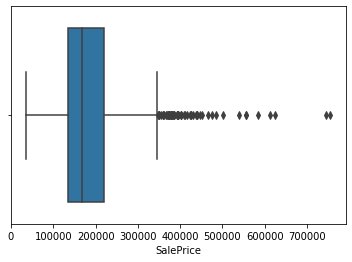

In [29]:
# price distribution after outlier treatment
sns.boxplot(housing_df["SalePrice"])

As We can clearly see that the numerical distribution value of sales has a  highly left skewed, hence transforming it to log scale would be a good choice

In [30]:
housing_df['SalePrice'] = housing_df['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)

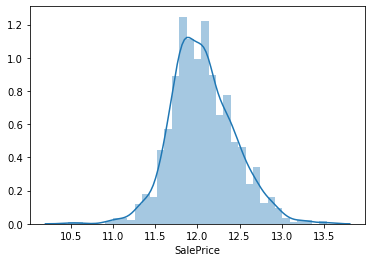

In [31]:
sns.distplot(housing_df["SalePrice"])

# Step-1: EDA 

In [32]:
def univariate_analysis(col_name, full_name, continuous, sort = True, orientation= 'horizontal'):
    """
    Customised function for visualizing a column using housing_df
    - col_name is the colum name in the dataframe to be analysed
    - full_name is the full name of the column
    - continuous is True if the variable is continuous, False otherwise
    - sort : if true then sort the bars
    """
    if orientation == 'vertical':
        rows = 2
        cols = 1
        f, ((ax1), (ax2)) = plt.subplots(nrows=rows, ncols=cols, figsize=(12,5), dpi=90)
        plt.xticks(rotation = 90)
        
    else:
        rows =1
        cols =2
        f, (ax1, ax2) = plt.subplots(nrows=rows, ncols=cols, figsize=(12,3), dpi=90)
    
    #plt.xticks(rotation=orientation)
    # Plot without loan status
    if continuous:
        sns.distplot(housing_df.loc[housing_df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        if sort:
            sns.countplot(housing_df[col_name], order=sorted(housing_df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
        else:
            sns.countplot(housing_df[col_name], order=housing_df[col_name].unique(), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    
    # second plot
    if continuous:
        sns.boxplot(x=col_name,  data=housing_df, ax=ax2)
    else:
        housing_df[col_name].value_counts().plot.pie(ax = ax2, autopct='%.1f%%',legend=True,title=f"Percentage distribution in  {col_name}")
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

## Univariate for  Numerical Variables

In [33]:
# extracting list of column names have numeric data type
numeric_cols = [x for x in housing_df.select_dtypes(include=np.number).columns.tolist() if x!="SalePrice"]
print(f"There are {len(numeric_cols)} numeric columns (including some ordinal categorical) excluding \"price\"")
numeric_cols

There are 35 numeric columns (including some ordinal categorical) excluding "price"


['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [34]:
first_ten = numeric_cols[0:10]
second_ten = numeric_cols[10:20]
last_batch = numeric_cols[20:]

def analyse_batch(col_list):
    for col in col_list:
        univariate_analysis(col,str(col), True)
    


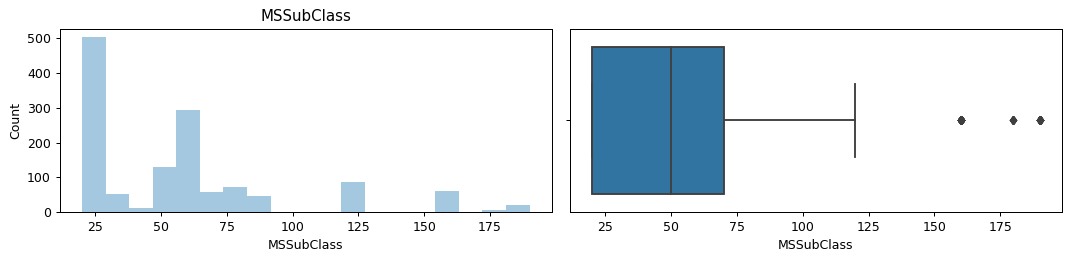

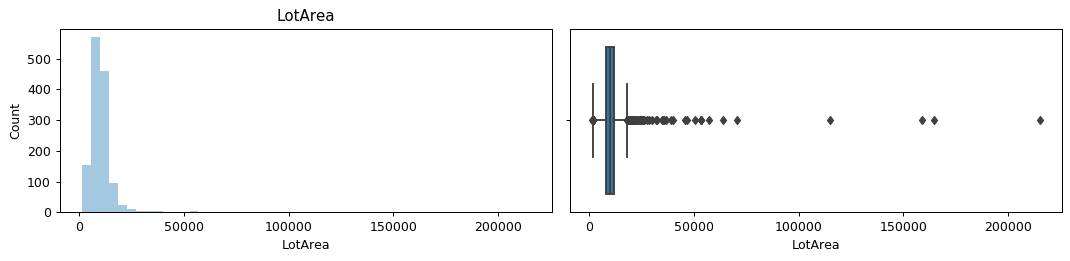

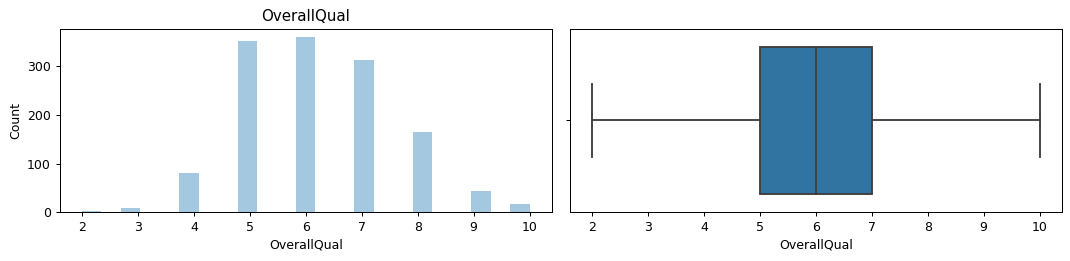

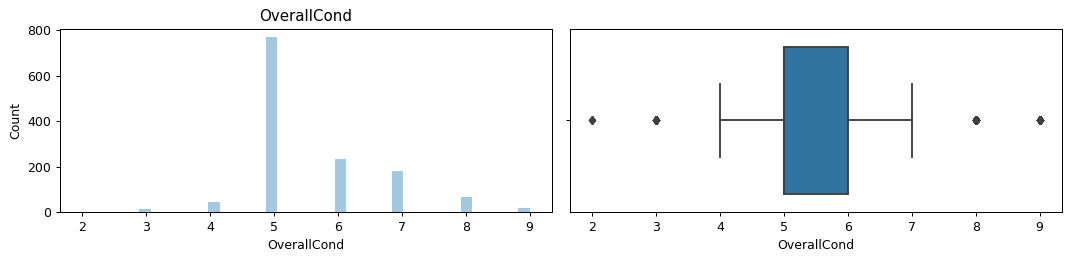

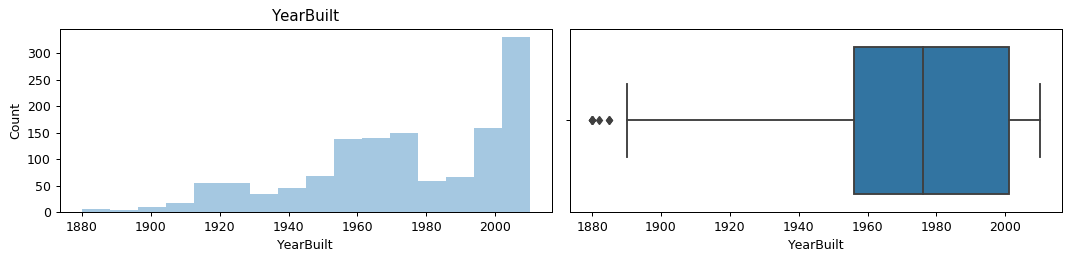

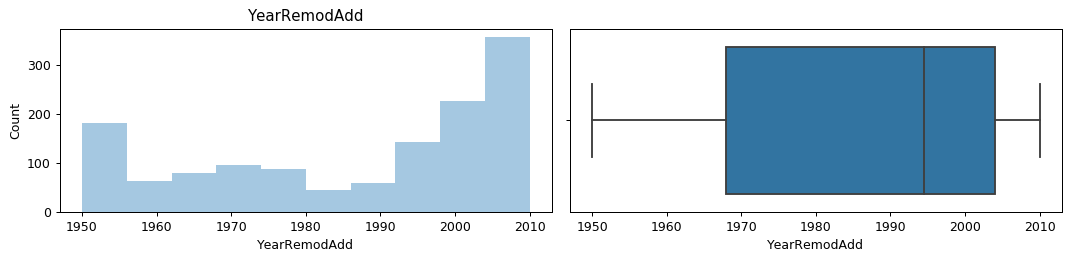

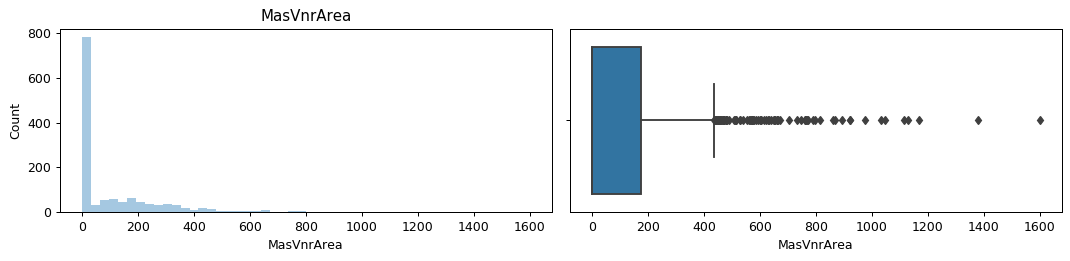

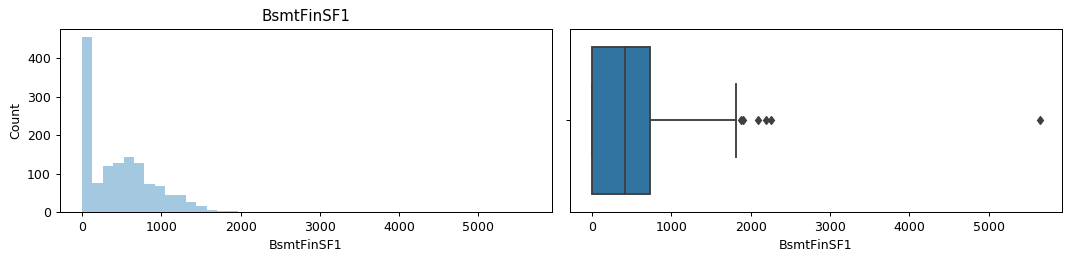

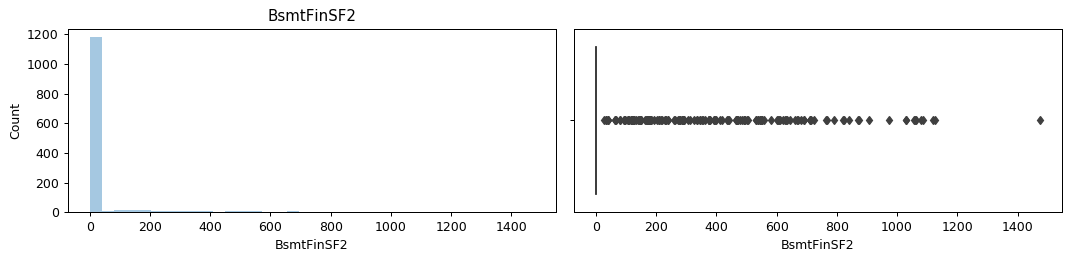

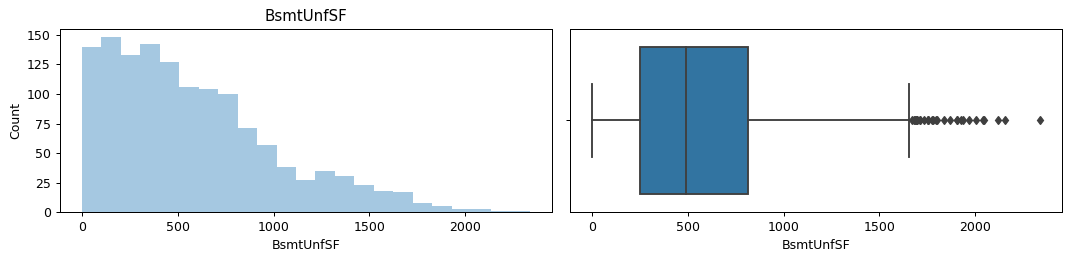

In [35]:
analyse_batch(first_ten)

Observations

- LotArea has a highly skewed distribution with a lot of outliers
- MasVnrArea has a oddly high concentration near 0 and presence of outliers
- BsmtSF1 has oddly high concentration around 0 and a few outliers
- Bsmtfin SF2 has a lot of outliers -treatment required


In [36]:
# as this column is of not much importance from data definition, hence dropping
# housing_df.drop(['BsmtFinSF2'],axis=1, inplace=True)
# housing_df.drop(['FireplaceQu','LotFrontage'], axis=1, inplace=True)

In [37]:
numeric_cols.remove('BsmtFinSF2')

In [38]:
first_ten.remove('BsmtFinSF2')
first_ten

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF']

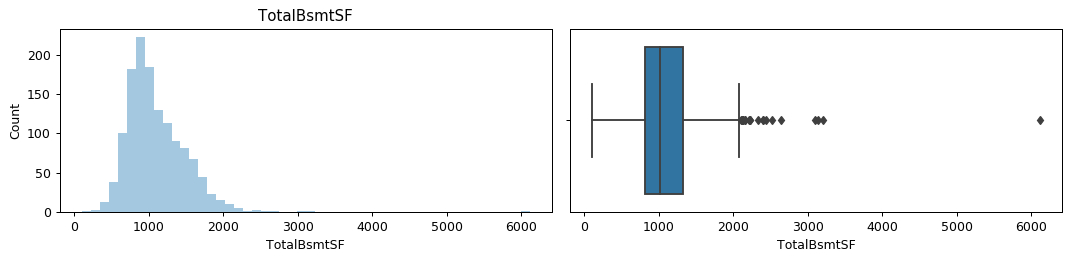

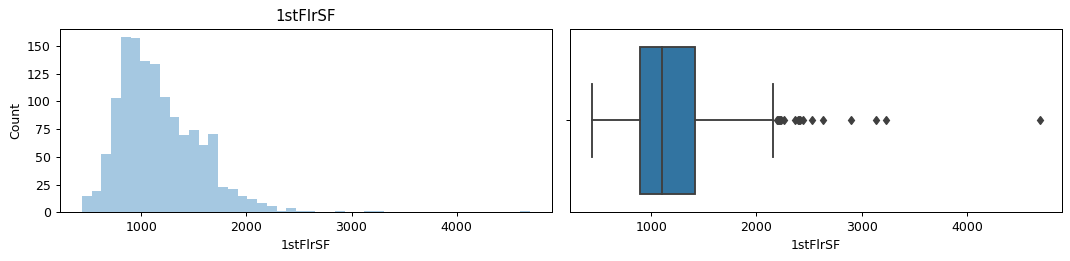

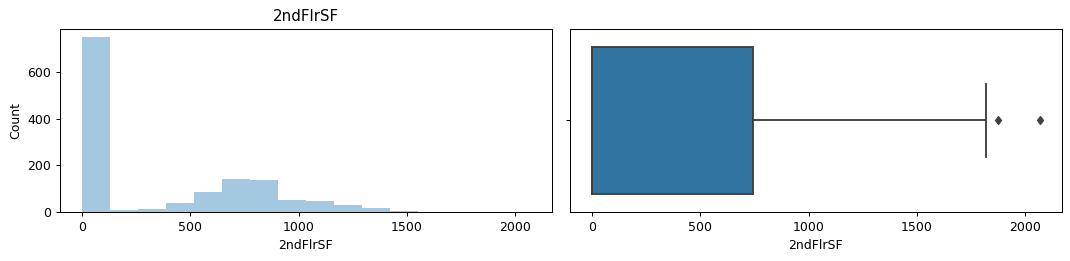

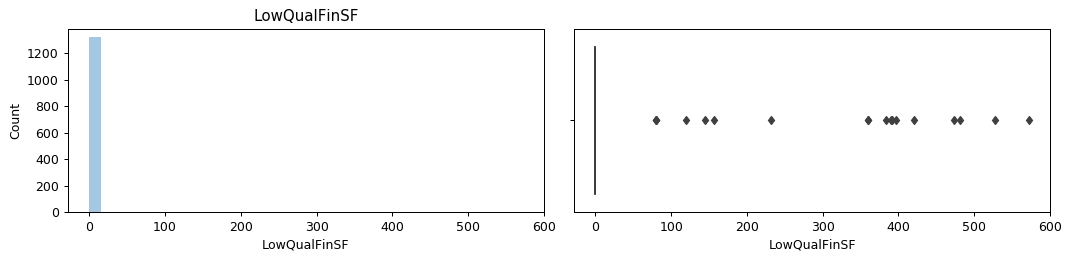

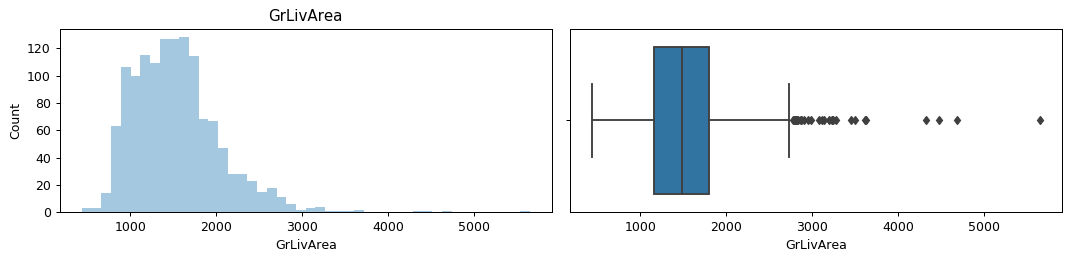

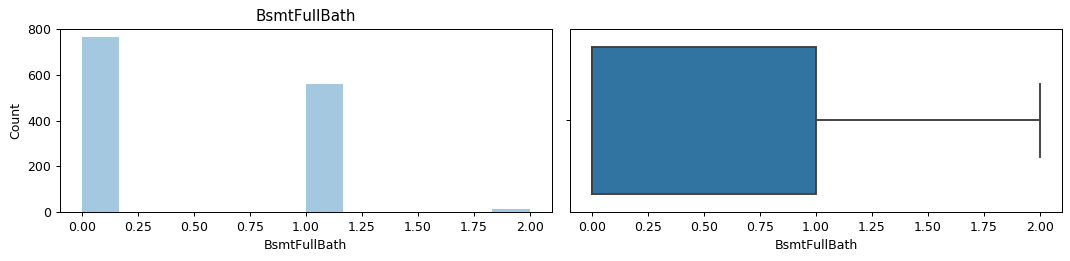

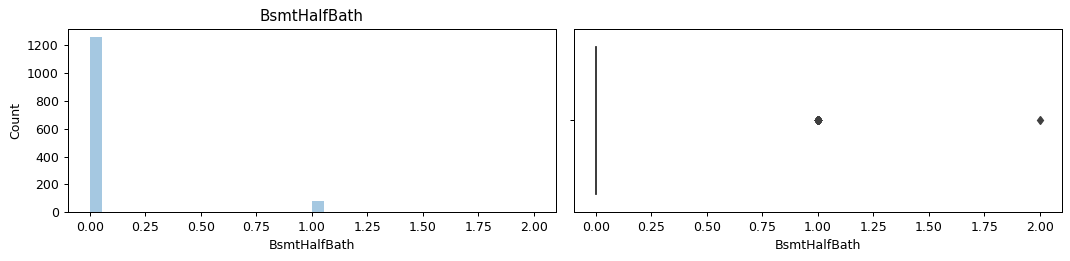

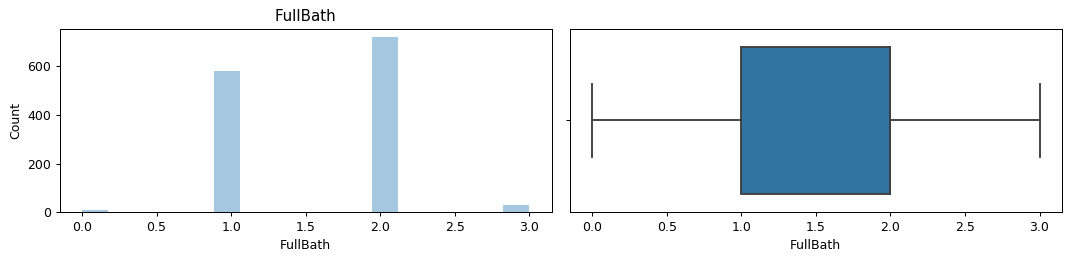

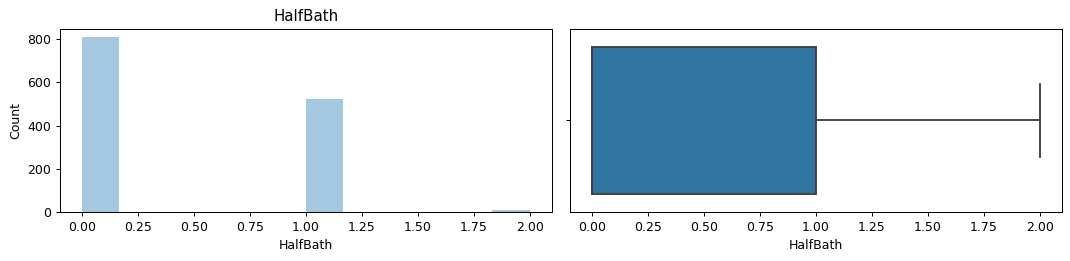

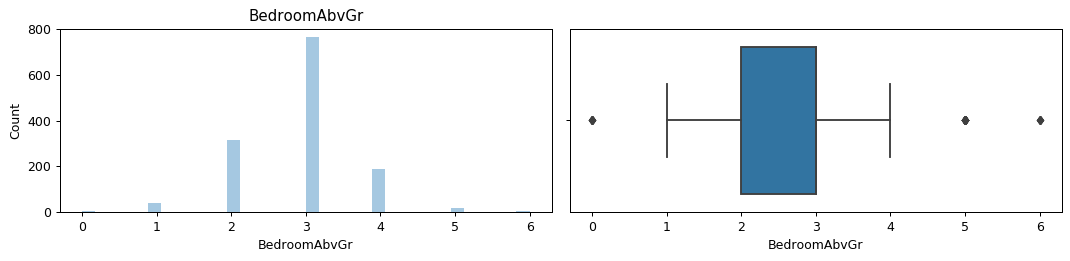

In [39]:
analyse_batch(second_ten)

Observations:
    - 2ndFirSF has oddly high concentration around 0
    - LowQualfinSF has a lot of outliers and very high concentration at 0  - treatment required
    - BsmtHalfBath has most of its data at 0 - treatment required
    

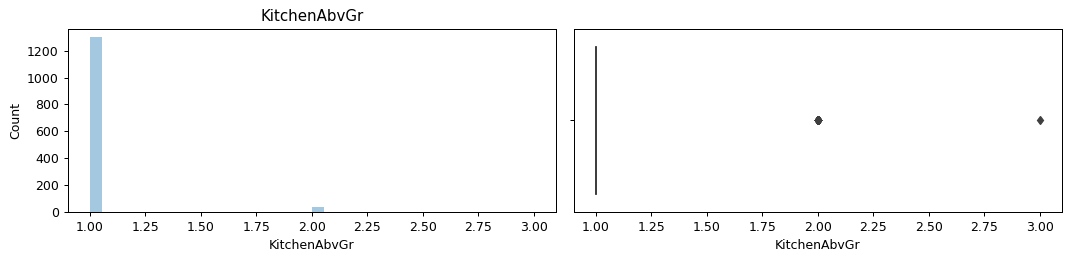

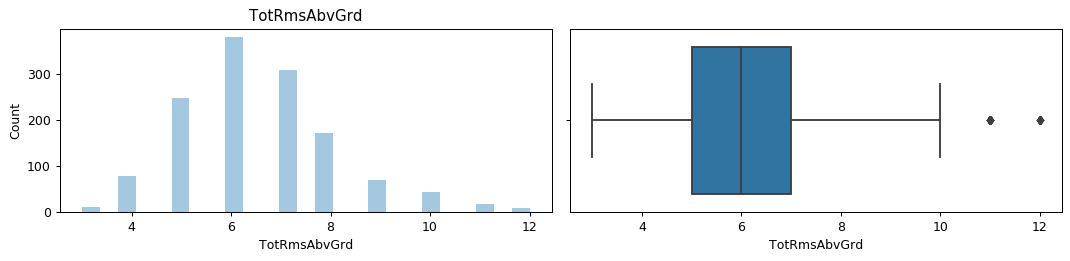

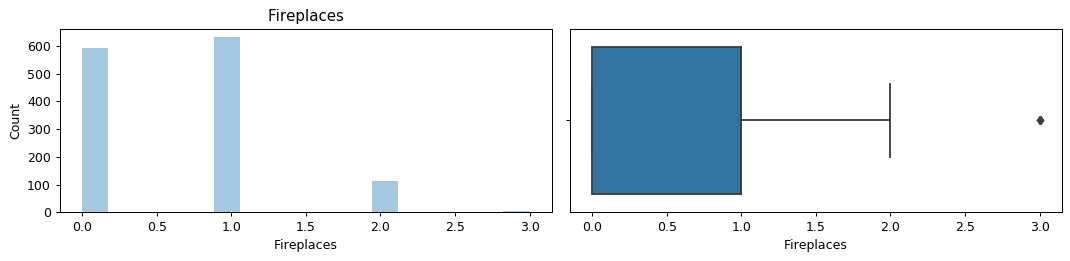

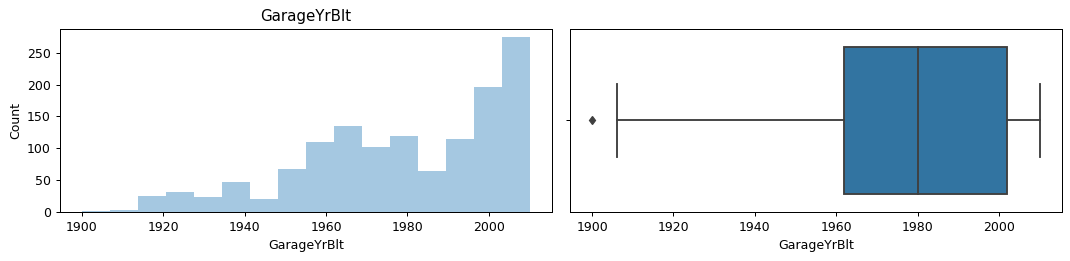

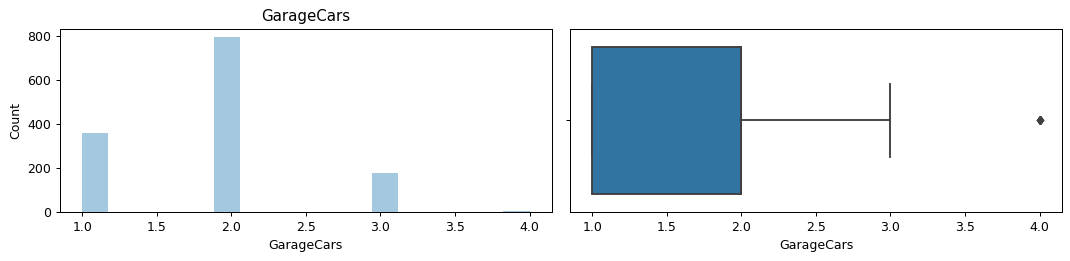

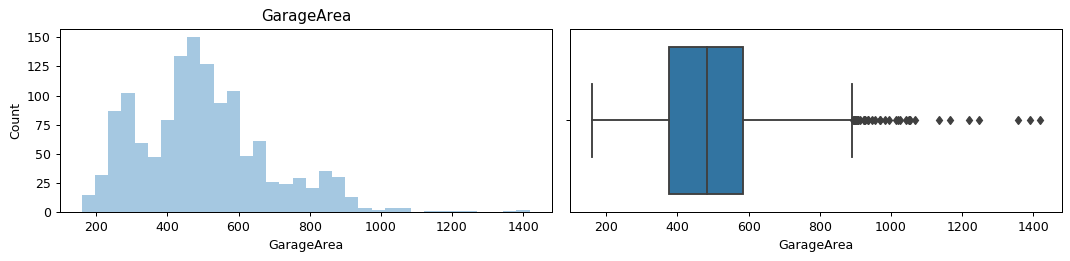

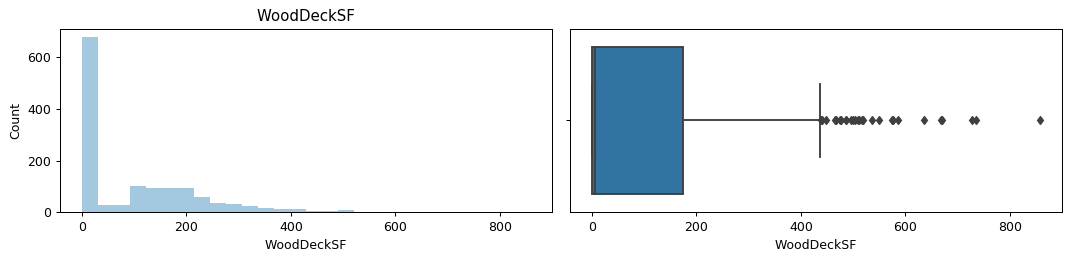

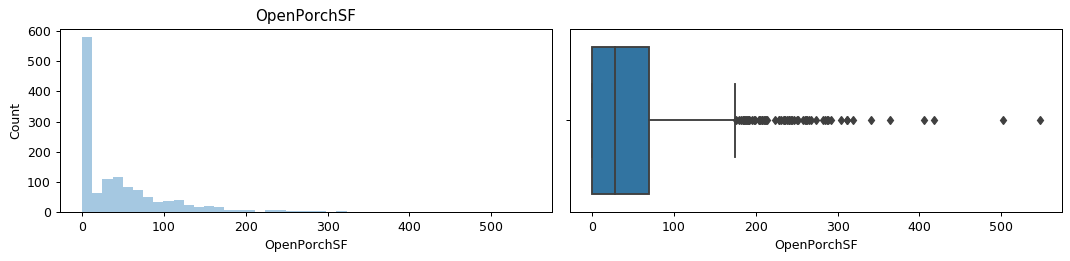

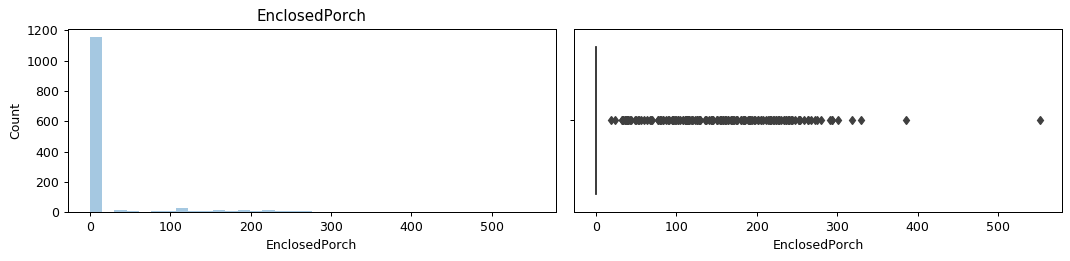

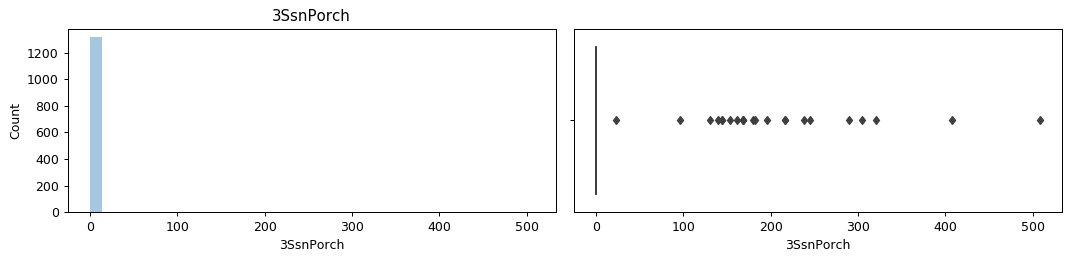

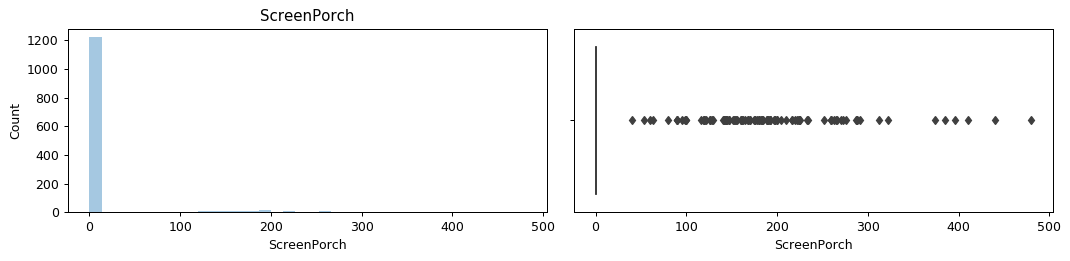

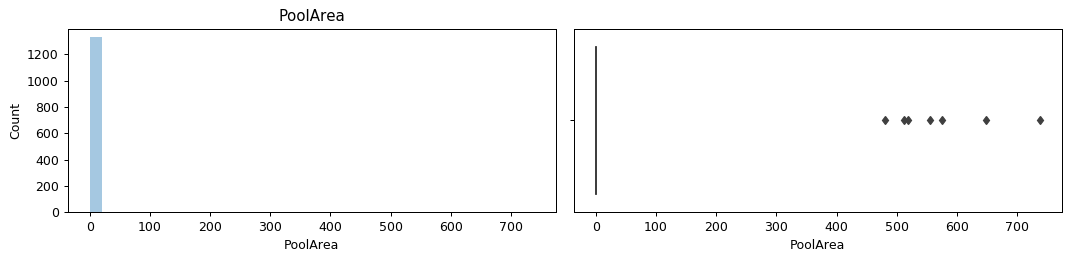

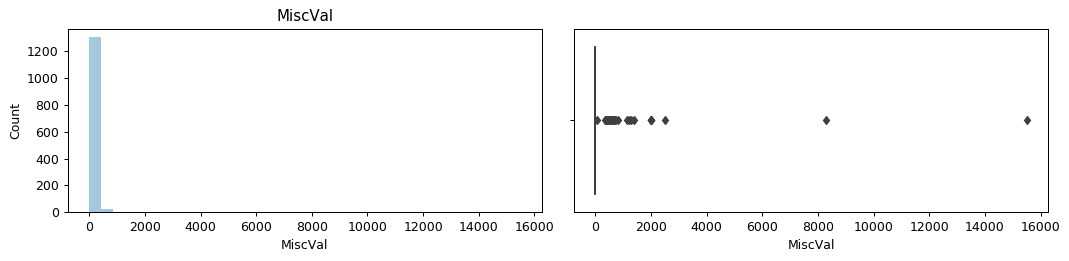

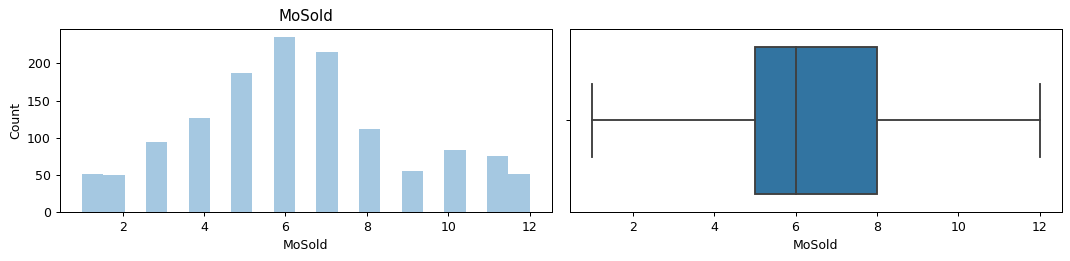

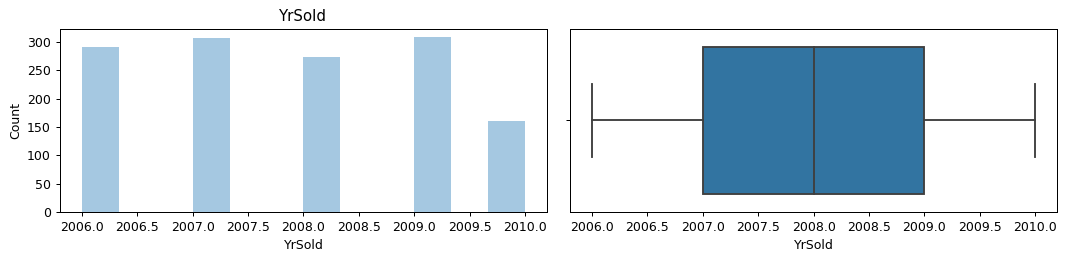

In [40]:
analyse_batch(last_batch)

Observations:
    - kitchenAbvGr require further analysis
    - EnclosedPorch has a lot of outliers and very high concentration at 0  - treatment required
    - 3SsnPorch has a lot of outliers and very high concentration at 0  - treatment required
    - ScreenPorch has a lot of outliers and very high concentration at 0  - treatment required
    - PoolArea has most of its data at 0 - treatment required
    

## Bivariate for Numerical columns

plotting column 0 to 4 out of 34
plotting column 4 to 8 out of 34
plotting column 8 to 12 out of 34
plotting column 12 to 16 out of 34
plotting column 16 to 20 out of 34
plotting column 20 to 24 out of 34
plotting column 24 to 28 out of 34
plotting column 28 to 32 out of 34
plotting column 32 to 34 out of 34


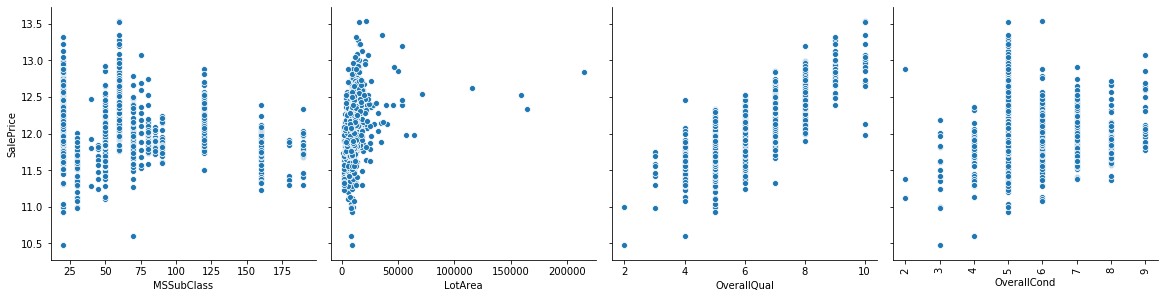

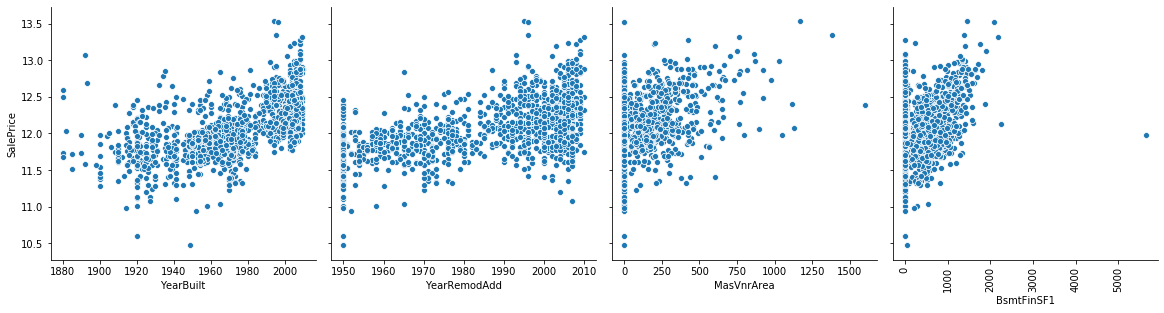

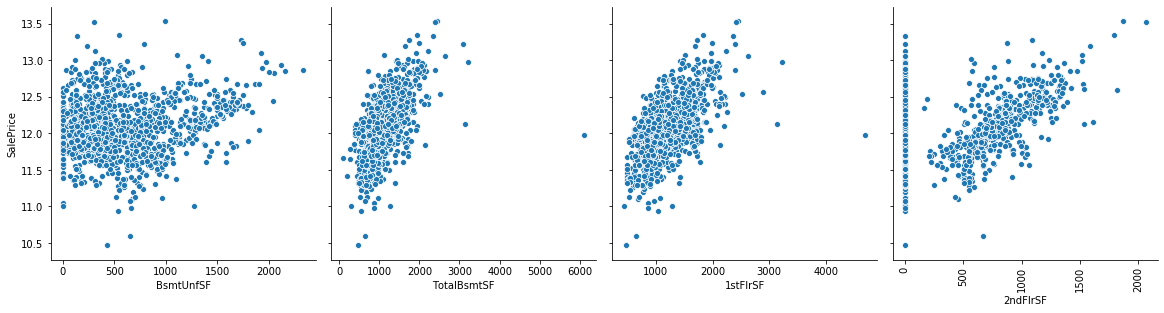

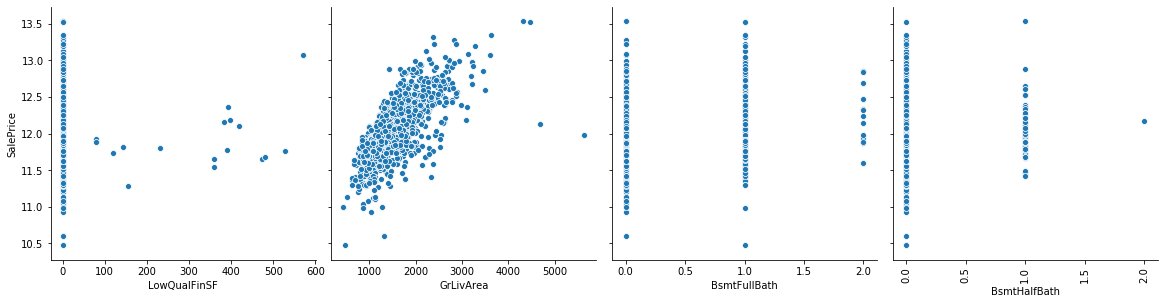

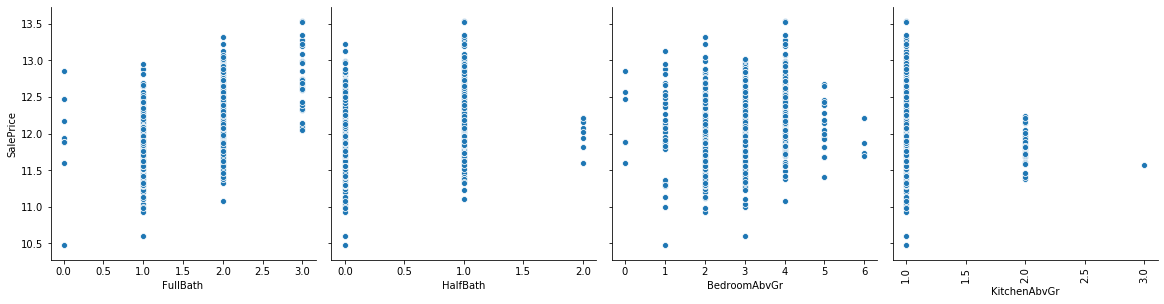

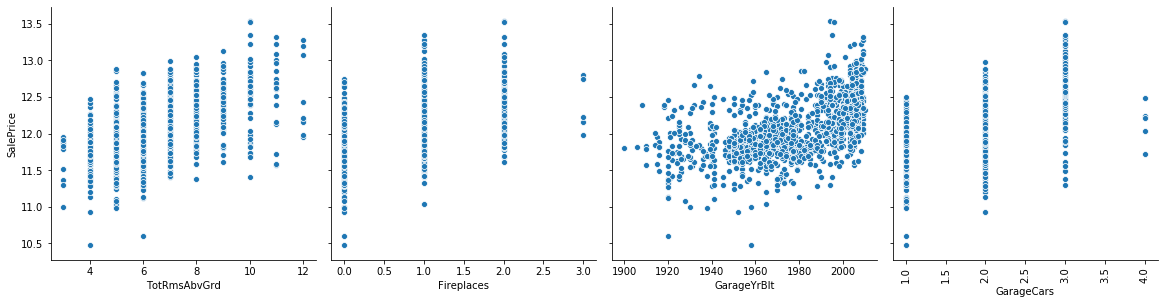

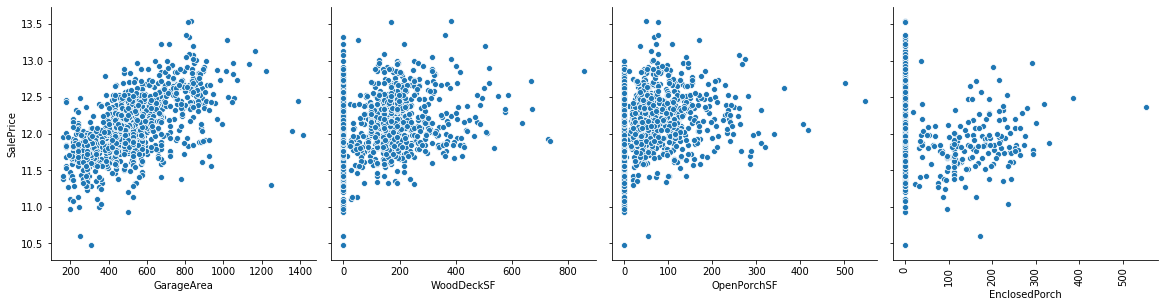

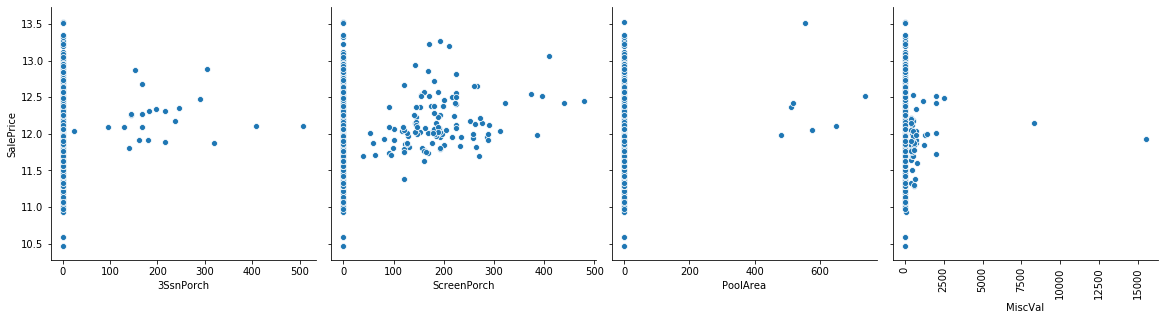

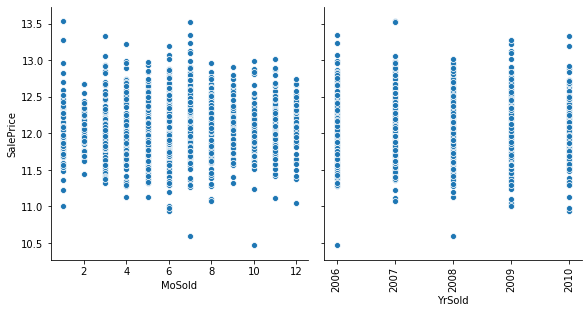

In [41]:
# bivariate for numerical and ordinal categorical

def price_versus(col_list):
    sns.pairplot(data=housing_df,
                  y_vars=['SalePrice'],
                  x_vars=col_list,height=4)

#     plt.tight_layout()

for i in range(0,len(numeric_cols)-1,4):
    end = i+4
    if end >= len(numeric_cols):
        end = len(numeric_cols)
    print(f"plotting column {i} to {end} out of {len(numeric_cols)}")
    price_versus(numeric_cols[i:end])
    plt.xticks(rotation = 90)

<b><u>Observations</u></b>

Correlation with sales price:

<b>TotalBsmtSF, 1stFloorSF, 2ndFlrSF, GrLivArea</b> show high positive correlation

<b>GarageYrBit,GarageArea </b>show good positive correlation

<b>EnclosedPorch, WoodDeckSF, OpenPorchSF,ScreenPorch</b> show feeble positive correlation

<b>TotalRmsAbvGrd, GarageCars, OverallQual</b> show good positive correlation

<b>Fireplaces,OverallCond </b>show feeble positive correlation

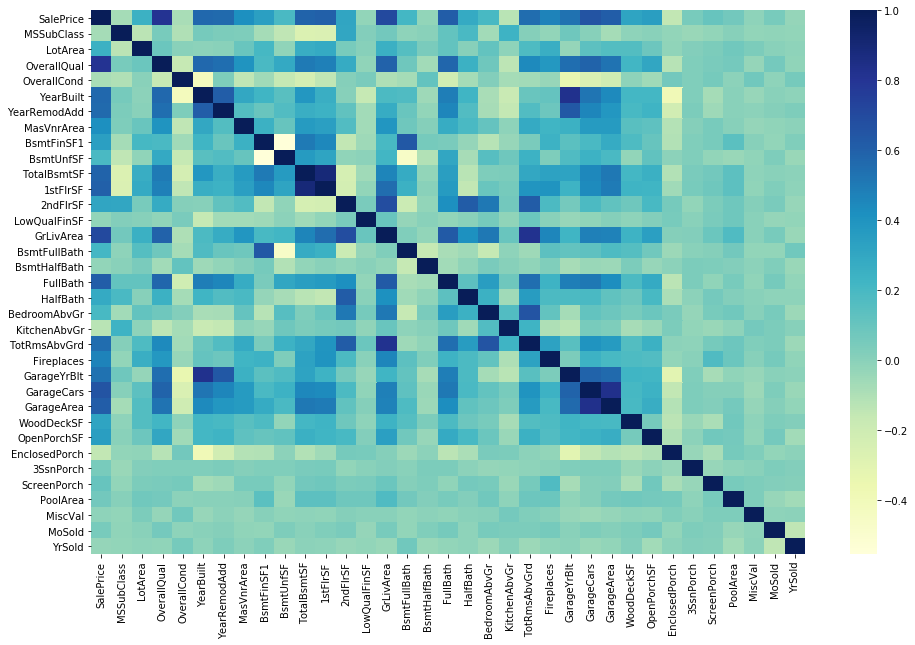

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(housing_df[['SalePrice']+numeric_cols].corr(), cmap="YlGnBu")
plt.show()

- Overall quality, and garage related attributes show good correlation with salesprice
- enclosed Porch and Kitchen above ground arre feebly negatively correlated with sales price

## Univariate for  Categorical Variables

In [43]:
# Extracting categorical variable
categorical_cols = housing_df.select_dtypes(include=["object"]).columns.tolist()
print(f"There are {len(categorical_cols)} categroical columns")
print(categorical_cols)

There are 38 categroical columns
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [44]:
first_ten = categorical_cols[0:10]
second_ten = categorical_cols[10:20]
third_ten = categorical_cols[20:30]
last_batch = categorical_cols[30:]

def analyse_batch(col_list):
    for col in col_list:
        univariate_analysis(col,str(col), False)
    

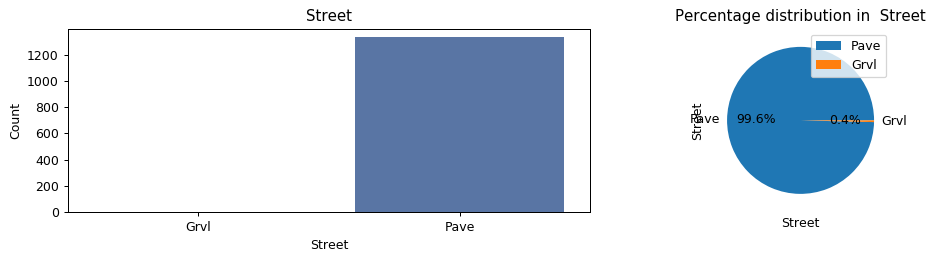

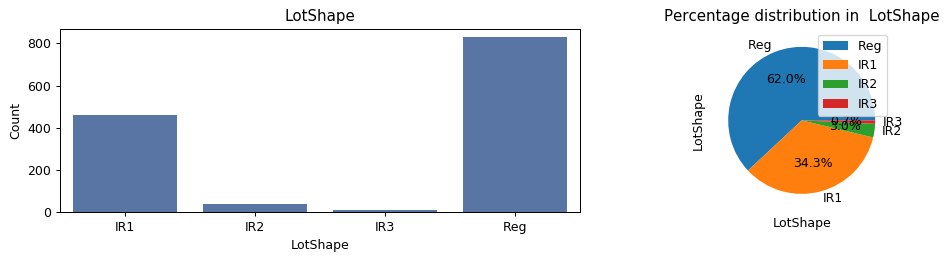

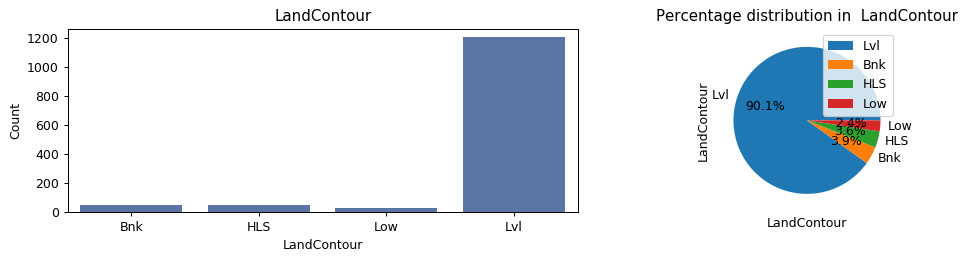

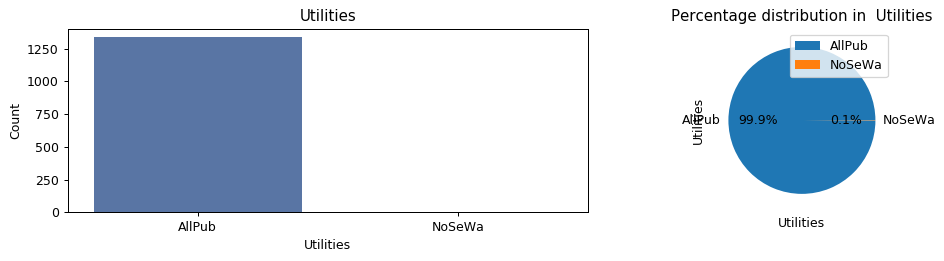

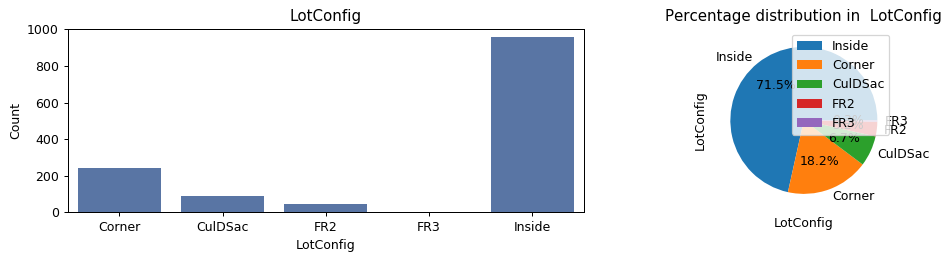

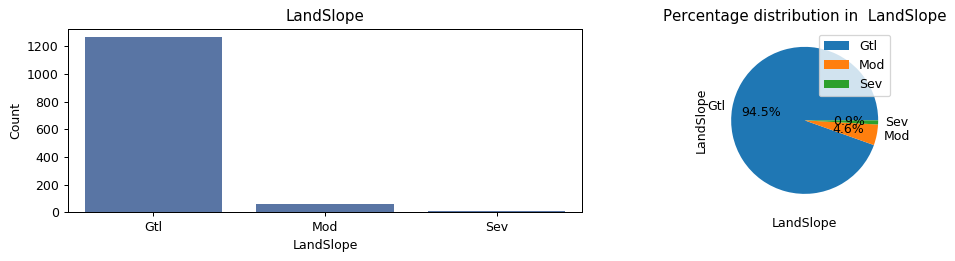

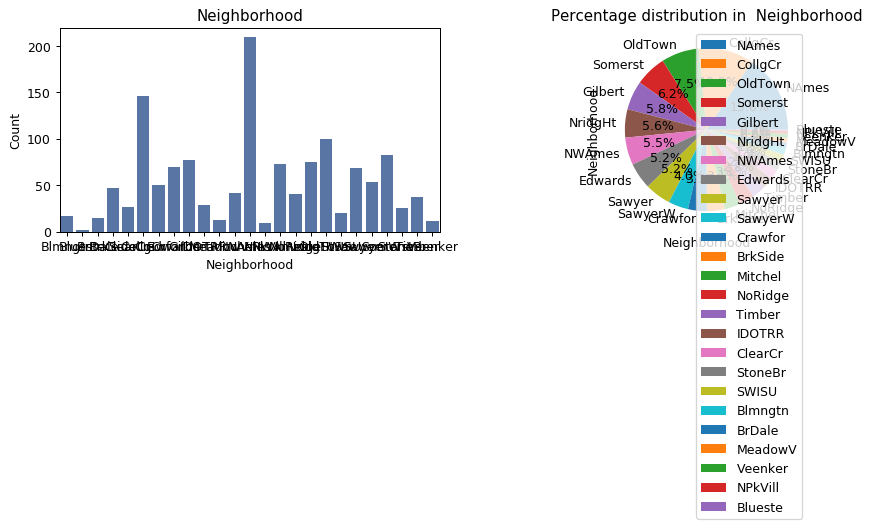

In [45]:
analyse_batch(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood'])

Observations:
- Street, 99% data represents pave: drop column as this doesn't help model learn
- LandContour has 89% Lvl data
- Utilities have 99.95 values "AllPub" : drop column as this doesn't help model learn
- LandSlope has 94% Gtl values only
- Condition2 has 99% values as Norm

In [46]:
# As we can see a lot of categorical variables have skewed values(around 90% of only one value)
housing_df_bkp = housing_df
for column in categorical_cols:
        if(housing_df[column].value_counts().iloc[0]/len(housing_df)>0.90):
            print(column)
            housing_df.drop(column,axis=1, inplace=True)

Street
LandContour
Utilities
LandSlope
Condition2
RoofMatl
BsmtCond
Heating
CentralAir
Electrical
Functional
GarageQual
GarageCond
PavedDrive


In [47]:
housing_df.shape

(1338, 60)

## Step 2: Data Cleaning and Preparation


In [48]:
housing_df[housing_df.isnull().sum(axis=1)>0]

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [49]:
# drop null values row wise
housing_df = housing_df.dropna(how='any',axis=0)
housing_df.shape

(1338, 60)

In [50]:
housing_df[housing_df.isnull().sum(axis=1)>0]

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [51]:
# #derived feature: calculating years since current year

# housing_df[['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold']]=housing_df[['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold']
#                                                                     ].apply(lambda x:2020-x)

In [52]:
housing_df = housing_df.loc[:,~housing_df.columns.duplicated()]

In [53]:
categorical_cols = housing_df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [54]:
dummies = pd.get_dummies(housing_df[categorical_cols], drop_first = True)

In [55]:
housing_df =housing_df.drop(categorical_cols,axis=1)

In [56]:
housing_df = pd.concat([housing_df,dummies],axis=1)
housing_df.shape

(1338, 179)

# Modelling

## Step 3: Splitting the Data into Features (independent) and Target(dependent)


In [57]:
# Splitting the data into features and 
X=housing_df.drop('SalePrice',axis=1)
y=housing_df['SalePrice']

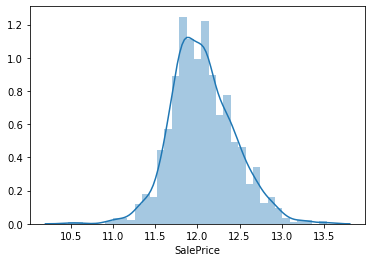

In [58]:
#Plotting the target variable 
sns.distplot(y)

### Splitting the data into training and test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [60]:
print(X_train.shape)
print(X_test.shape)

(936, 178)
(402, 178)


In [61]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1059,50,11275,6,7,1932,1950,480.0,297,557,0,...,0,0,0,0,1,0,0,0,1,0
571,20,7332,6,6,1959,1959,207.0,414,0,450,...,0,0,0,0,1,0,0,0,0,0
173,20,10197,6,5,1961,1961,491.0,288,374,700,...,0,0,0,0,0,0,0,0,1,0
732,60,11404,7,5,1998,1999,202.0,252,0,901,...,0,0,0,0,1,0,0,0,1,0
1282,20,8800,5,7,1977,2008,0.0,532,144,364,...,0,0,0,0,1,0,0,0,1,0


In [62]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,20,12968,5,6,1962,1962,0.0,737,0,175,...,0,0,0,0,1,0,0,0,1,0
335,190,164660,5,6,1965,1965,0.0,1249,147,103,...,0,0,0,0,1,0,0,0,1,0
348,160,2448,7,5,2003,2004,106.0,573,0,191,...,0,0,0,0,1,0,0,0,1,0
885,120,5119,9,5,1999,2000,60.0,1238,0,460,...,0,0,0,0,0,0,0,0,0,0
175,20,12615,6,7,1950,2001,0.0,477,0,725,...,0,0,0,0,1,0,0,0,1,0


### Scaling the feature


To be able to interpret the results in a better way, we need to scale the numerical features.

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [64]:
X_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,...,936.000000,936.000000,936.000000,936.000000,936.000000,936.0,936.000000,936.000000,936.000000,936.000000
mean,0.209245,0.057860,0.525240,0.511294,0.718353,0.597952,0.068571,0.202674,49.712607,0.247308,...,0.002137,0.004274,0.088675,0.001068,0.868590,0.0,0.004274,0.014957,0.831197,0.090812
std,0.243295,0.047781,0.164172,0.152548,0.228399,0.337182,0.115990,0.192556,168.682811,0.184953,...,0.046200,0.065267,0.284426,0.032686,0.338029,0.0,0.065267,0.121447,0.374778,0.287495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.041218,0.375000,0.428571,0.580709,0.300000,0.000000,0.000000,0.000000,0.107877,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.052632,0.500000,0.428571,0.740157,0.750000,0.000000,0.178540,0.000000,0.212971,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.065314,0.625000,0.571429,0.937008,0.900000,0.109062,0.324004,0.000000,0.346104,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1474.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


## Scale test variables

test and train variables should be on the same scale

In [65]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [66]:
X_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
12,0.000000,0.073989,0.375,0.571429,0.629921,0.200000,0.00000,0.326106,0,0.074914,...,0,0,0,0,1,0,0,0,1,0
335,1.000000,1.035891,0.375,0.571429,0.653543,0.250000,0.00000,0.552655,147,0.044092,...,0,0,0,0,1,0,0,0,1,0
348,0.823529,0.007280,0.625,0.428571,0.952756,0.900000,0.06625,0.253540,0,0.081764,...,0,0,0,0,1,0,0,0,1,0
885,0.588235,0.024217,0.875,0.428571,0.921260,0.833333,0.03750,0.547788,0,0.196918,...,0,0,0,0,0,0,0,0,0,0
175,0.000000,0.071750,0.500,0.714286,0.535433,0.850000,0.00000,0.211062,0,0.310360,...,0,0,0,0,1,0,0,0,1,0


In [67]:
X_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,...,402.000000,402.0,402.000000,402.0,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.220296,0.063808,0.532649,0.519545,0.713069,0.586401,0.069916,0.211793,48.067164,0.254124,...,0.004975,0.0,0.084577,0.0,0.858209,0.002488,0.007463,0.014925,0.810945,0.087065
std,0.241307,0.094744,0.168837,0.157428,0.242938,0.341088,0.116173,0.225595,160.458626,0.196136,...,0.070447,0.0,0.278598,0.0,0.349270,0.049875,0.086171,0.121405,0.392040,0.282281
min,0.000000,0.002410,0.000000,0.000000,-0.015748,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.039824,0.375000,0.428571,0.582677,0.283333,0.000000,0.000000,0.000000,0.097389,...,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.235294,0.052143,0.500000,0.428571,0.740157,0.733333,0.000000,0.190044,0.000000,0.205693,...,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.068375,0.625000,0.571429,0.944882,0.895833,0.108750,0.329757,0.000000,0.362586,...,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.356658,1.000000,1.000000,1.007874,1.000000,0.705625,2.497345,1085.000000,0.875856,...,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [98]:

ridge = Ridge()
from sklearn.feature_selection import RFE
rfe = RFE(ridge, 25)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 25),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 114),
 ('MasVnrArea', False, 105),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 150),
 ('BsmtUnfSF', False, 108),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 91),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 26),
 ('BsmtHalfBath', False, 100),
 ('FullBath', False, 30),
 ('HalfBath', False, 44),
 ('BedroomAbvGr', False, 89),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 87),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 10),
 ('OpenPorchSF', False, 45),
 ('EnclosedPorch', False, 15),
 ('3SsnPorch', False, 13),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 78),
 ('MiscVal', False, 90),
 ('MoSold', False, 142),
 ('YrSold', False, 122),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', Fals

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'ScreenPorch',
       'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition1_PosN',
       'Condition1_RRAe', 'Foundation_Wood', 'SaleCondition_Alloca'],
      dtype='object')

# Ridge

In [101]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,2.0, 3.0,4.0, 
  5.0, 6.0, 7.0, 8.0, 9.0,10.0]}


ridge = Ridge()

# cross validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col], y_train)

Fitting 7 folds for each of 23 candidates, totalling 161 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 161 out of 161 | elapsed:    0.6s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [102]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.003989,0.000749,0.001425,0.000493,0.0001,{'alpha': 0.0001},-0.086876,-0.090097,-0.082407,-0.092635,...,12,-0.082646,-0.081346,-0.082722,-0.078846,-0.083803,-0.081580,-0.082438,-0.081911,0.001458
1,0.003299,0.000432,0.001421,0.000488,0.001,{'alpha': 0.001},-0.086851,-0.090097,-0.082406,-0.092633,...,11,-0.082649,-0.081346,-0.082722,-0.078845,-0.083803,-0.081580,-0.082440,-0.081912,0.001459
2,0.002565,0.000727,0.001139,0.000349,0.01,{'alpha': 0.01},-0.086665,-0.090100,-0.082399,-0.092613,...,9,-0.082671,-0.081353,-0.082724,-0.078841,-0.083798,-0.081583,-0.082459,-0.081919,0.001461
3,0.002417,0.000498,0.001140,0.000349,0.05,{'alpha': 0.05},-0.086324,-0.090110,-0.082365,-0.092560,...,6,-0.082718,-0.081384,-0.082738,-0.078855,-0.083794,-0.081619,-0.082526,-0.081948,0.001461
4,0.002137,0.000638,0.001022,0.000580,0.1,{'alpha': 0.1},-0.086170,-0.090121,-0.082320,-0.092517,...,4,-0.082748,-0.081422,-0.082760,-0.078886,-0.083802,-0.081657,-0.082609,-0.081983,0.001459
5,0.002565,0.000727,0.001277,0.000454,0.2,{'alpha': 0.2},-0.086024,-0.090160,-0.082233,-0.092468,...,1,-0.082795,-0.081503,-0.082808,-0.078954,-0.083831,-0.081723,-0.082797,-0.082059,0.001457
6,0.003138,0.000334,0.001129,0.000340,0.3,{'alpha': 0.3},-0.085942,-0.090205,-0.082152,-0.092460,...,2,-0.082843,-0.081592,-0.082880,-0.079010,-0.083865,-0.081788,-0.082975,-0.082136,0.001461
7,0.001855,0.000642,0.000717,0.000454,0.4,{'alpha': 0.4},-0.085903,-0.090266,-0.082080,-0.092455,...,3,-0.082918,-0.081692,-0.082970,-0.079071,-0.083905,-0.081852,-0.083138,-0.082221,0.001467
8,0.002564,0.000494,0.000998,0.000001,0.5,{'alpha': 0.5},-0.085868,-0.090343,-0.082062,-0.092458,...,5,-0.083012,-0.081796,-0.083072,-0.079131,-0.083960,-0.081916,-0.083289,-0.082311,0.001477
9,0.002000,0.000012,0.000987,0.000015,0.6,{'alpha': 0.6},-0.085830,-0.090426,-0.082047,-0.092476,...,7,-0.083104,-0.081900,-0.083171,-0.079209,-0.084017,-0.081982,-0.083441,-0.082403,0.001483


In [103]:
model_cv.best_params_

{'alpha': 0.2}

In [104]:
model_cv.best_score_

-0.08554397466260948

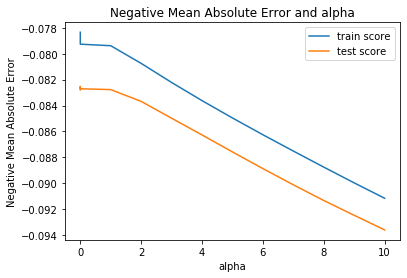

In [76]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [105]:
#Now, Lets create the final Ridge Model
ridge = Ridge(alpha=0.2)
final_ridge_model = ridge.fit(X_train[col], y_train)

#### RSquared values for final Ridge Model

In [106]:
print('Rsq for train set  : {0}'.format(final_ridge_model.score(X_train[col],y_train)))
print('Rsq for test set : {0}'.format(final_ridge_model.score(X_test[col],y_test)))


Rsq for train set  : 0.8927801627018133
Rsq for test set : 0.7588836365351566


In [107]:
final_ridge_model.coef_

array([ 0.43838545,  0.57602678,  0.37117518,  0.44135681,  0.20848343,
        0.41742482,  0.21618431,  0.24344109,  0.34789906, -0.25814501,
        0.1984788 ,  0.0990883 ,  0.08150071,  0.22778005,  0.1003771 ,
        0.22836436,  0.19585363,  0.16590471, -0.18096875,  0.1404654 ,
       -0.14077013, -0.13106734, -0.1440349 , -0.13388081, -0.18869381])

In [108]:
list(zip(X_train[col].columns,final_ridge_model.coef_))

[('LotArea', 0.43838544579753075),
 ('OverallQual', 0.5760267791304514),
 ('OverallCond', 0.37117518034988356),
 ('YearBuilt', 0.4413568066293423),
 ('BsmtFinSF1', 0.20848342891482982),
 ('TotalBsmtSF', 0.41742481920182956),
 ('1stFlrSF', 0.2161843055554007),
 ('2ndFlrSF', 0.24344108535667505),
 ('GrLivArea', 0.34789905840265173),
 ('KitchenAbvGr', -0.2581450050768315),
 ('TotRmsAbvGrd', 0.19847880355738623),
 ('Fireplaces', 0.09908829600793352),
 ('GarageCars', 0.0815007131468267),
 ('GarageArea', 0.22778004682535077),
 ('ScreenPorch', 0.10037709791642115),
 ('MSZoning_FV', 0.2283643558769132),
 ('MSZoning_RL', 0.1958536298364554),
 ('MSZoning_RM', 0.16590470675464675),
 ('Neighborhood_BrDale', -0.1809687500421603),
 ('Neighborhood_Crawfor', 0.1404653958868314),
 ('Neighborhood_MeadowV', -0.1407701345691256),
 ('Condition1_PosN', -0.13106733860638894),
 ('Condition1_RRAe', -0.1440349048084038),
 ('Foundation_Wood', -0.13388081230365725),
 ('SaleCondition_Alloca', -0.188693807307414)]

In [109]:
coef_df_ridge=pd.DataFrame(list(zip(X_train[col].columns,final_ridge_model.coef_)),columns=['Column','Coef'])
coef_df_ridge['Absolute Coef'] = abs(coef_df_ridge['Coef'])
coef_df_ridge
ordered_column_coef = coef_df_ridge.sort_values("Absolute Coef", ascending = False)

## Top Features from Ridge

In [110]:
ordered_column_coef.head(5)

,Column,Coef,Absolute Coef
1,OverallQual,0.576027,0.576027
3,YearBuilt,0.441357,0.441357
0,LotArea,0.438385,0.438385
5,TotalBsmtSF,0.417425,0.417425
2,OverallCond,0.371175,0.371175


# Lasso


In [111]:
lasso = Lasso()

lasso_params = {'alpha': [0.000001, 0.00001,0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lasso_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 7 folds for each of 16 candidates, totalling 112 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 112 out of 112 | elapsed:    0.6s finished


GridSearchCV(cv=7, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [112]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head(9)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.013250,0.004255,0.001499,4.621087e-04,1e-06,{'alpha': 1e-06},-0.086810,-0.090112,-0.082402,-0.092631,...,2,-0.082650,-0.081347,-0.082720,-0.078844,-0.083800,-0.081577,-0.082438,-0.081911,0.001458
1,0.010685,0.002484,0.001140,3.490398e-04,1e-05,{'alpha': 1e-05},-0.086585,-0.090157,-0.082352,-0.092613,...,1,-0.082674,-0.081352,-0.082719,-0.078832,-0.083795,-0.081586,-0.082434,-0.081913,0.001462
2,0.008548,0.003324,0.001140,3.486092e-04,0.0001,{'alpha': 0.0001},-0.086888,-0.090614,-0.081852,-0.092663,...,3,-0.082802,-0.081467,-0.082783,-0.078914,-0.083857,-0.081691,-0.082493,-0.082001,0.001457
3,0.003984,0.000012,0.001296,4.505728e-04,0.001,{'alpha': 0.001},-0.089043,-0.096444,-0.083972,-0.096722,...,4,-0.088249,-0.086423,-0.088386,-0.083814,-0.088474,-0.086208,-0.088582,-0.087162,0.001651
4,0.002981,0.000019,0.001007,2.204556e-05,0.01,{'alpha': 0.01},-0.125689,-0.143746,-0.126043,-0.137033,...,5,-0.128053,-0.128319,-0.127506,-0.123986,-0.130345,-0.126940,-0.128151,-0.127614,0.001775
5,0.002558,0.000497,0.001003,1.266887e-05,0.05,{'alpha': 0.05},-0.282427,-0.304995,-0.274882,-0.286362,...,6,-0.285097,-0.283222,-0.284651,-0.285010,-0.287655,-0.284680,-0.282143,-0.284637,0.001589
6,0.002565,0.000493,0.000997,4.719464e-07,0.1,{'alpha': 0.1},-0.283864,-0.304995,-0.278063,-0.287370,...,7,-0.286586,-0.283222,-0.288238,-0.286121,-0.287655,-0.288138,-0.284589,-0.286364,0.001751
7,0.002422,0.000493,0.000997,5.330183e-04,0.2,{'alpha': 0.2},-0.283864,-0.304995,-0.278063,-0.287370,...,7,-0.286586,-0.283222,-0.288238,-0.286121,-0.287655,-0.288138,-0.284589,-0.286364,0.001751
8,0.001710,0.000451,0.000855,3.489287e-04,0.3,{'alpha': 0.3},-0.283864,-0.304995,-0.278063,-0.287370,...,7,-0.286586,-0.283222,-0.288238,-0.286121,-0.287655,-0.288138,-0.284589,-0.286364,0.001751


In [113]:
model_cv.best_params_

{'alpha': 1e-05}

In [114]:
model_cv.best_score_

-0.0857060447307016

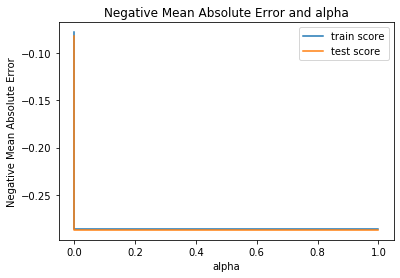

In [87]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [115]:
lasso = Lasso(alpha=0.00001)
final_lasso = lasso.fit(X_train[col], y_train)


## Rsquared value comparison for lasso

In [116]:
print("Lasso Regression final Rsquared Score for train and test data")
print('Rsq score for train set : {0}'.format(final_lasso.score(X_train[col],y_train)))
print('Rsq score for test set : {0}'.format(final_lasso.score(X_test[col],y_test)))

Lasso Regression final Rsquared Score for train and test data
Rsq score for train set : 0.8928778996201321
Rsq score for test set : 0.7553868416753164


In [122]:
coef_df_lasso=pd.DataFrame(list(zip(X_train[col].columns,final_lasso.coef_)),columns=['Column','Coef'])
coef_df_lasso["Absolute Coef"] = abs(coef_df_lasso['Coef'])
coef_df_lasso.sort_values("Absolute Coef", ascending = False)

,Column,Coef,Absolute Coef
8,GrLivArea,0.593571,0.593571
1,OverallQual,0.579646,0.579646
0,LotArea,0.481837,0.481837
3,YearBuilt,0.446044,0.446044
5,TotalBsmtSF,0.435440,0.435440
2,OverallCond,0.374572,0.374572
9,KitchenAbvGr,-0.259995,0.259995
15,MSZoning_FV,0.236204,0.236204
13,GarageArea,0.230923,0.230923
4,BsmtFinSF1,0.207962,0.207962


# Assignment Part-2 Problems

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans. The optimal value of alpha for Ridge Regression is 0.2.
The optimal value of alpha for Lasso Regression is 0.00001

Double the value of alpha for Rigde and lasso

### Doubling the ridge value

In [126]:
# 0.2*2 = 0.4 -> new alpha
ridge_double_alpha =Ridge(alpha=0.4).fit(X_train[col],y_train)

#printing results
print('R2 Score Train set : {0}'.format(ridge_double_alpha.score(X_train[col],y_train)))
print('R2 Score Test set : {0}'.format(ridge_double_alpha.score(X_test[col],y_test)))

R2 Score Train set : 0.8926062799218273
R2 Score Test set : 0.7618375914676917


### Top new Features for Ridge now

In [127]:
new_ridge_coef=pd.DataFrame(list(zip(X_train[col].columns,ridge_double_alpha.coef_)),columns=['Column','Coef'])
new_ridge_coef.iloc[new_ridge_coef['Coef'].abs().sort_values(ascending=False).index].head(5)

,Column,Coef
1,OverallQual,0.572903
3,YearBuilt,0.437845
5,TotalBsmtSF,0.405041
0,LotArea,0.399801
2,OverallCond,0.367460


### Doubling the Lasso value

In [120]:
# 0.00001*2 =0.00002 -> new alpha
lasso_double_alpha=Lasso(alpha=0.00002).fit(X_train[col],y_train)

#printing
print('R2 Score Train set : {0}'.format(lasso_double_alpha.score(X_train[col],y_train)))
print('R2 Score Test set : {0}'.format(lasso_double_alpha.score(X_test[col],y_test)))

R2 Score Train set : 0.8928778996201321
R2 Score Test set : 0.7553868416753164


### Top new features of Lasso now

In [121]:
coef_df_lasso_new=pd.DataFrame(list(zip(X_train[col].columns,lasso_new.coef_)),columns=['Column','Coef'])
coef_df_lasso_new.iloc[coef_df_lasso_new['Coef'].abs().sort_values(ascending=False).index].head(5)

,Column,Coef
8,GrLivArea,0.593571
1,OverallQual,0.579646
0,LotArea,0.481837
3,YearBuilt,0.446044
5,TotalBsmtSF,0.435440


### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

<b>Ans.</b> Similar results can be seen in both Ridge and Lasso.They have given us the optimal value, but in our case, Lasso has helped us feature selection by changing the coeffiecient of some variables to 0 which has made our model simpler than that of Ridge with similar results. So Lasso is a better choice as we can see a similar result as of Ridge(similar R2 score for Test and train) with some less variables.

## QUESTION 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? 

In [128]:
top5_cols_lasso = ['GrLivArea','OverallQual','LotArea','YearBuilt','TotalBsmtSF']
X_train_new=X_train.copy()
X_train_new.drop(top5_cols_lasso,axis=1,inplace=True)
X_test_new=X_test.copy()
X_test_new.drop(top5_cols_lasso,axis=1,inplace=True)

In [129]:
from sklearn.feature_selection import RFE

lr=LinearRegression()
rfe=RFE(lr,50)
rfe.fit(X_train_new,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=50, step=1, verbose=0)

In [131]:
rfe_cols = X_train_new.columns[rfe.support_]

X_train_rfe =X_train_new[rfe_cols]
X_test_rfe=X_test_new[rfe_cols]

In [132]:
lasso=Lasso()

In [133]:
#Declaring parameter for different value of alpha as hyperparameter
parameters={'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

In [134]:
#Using 5-KFold for Cross validation
folds = 6

In [135]:
#Using Grid Search for Cross Validation and Hyperparameter tuning
gscv_lasso=GridSearchCV(estimator=lasso,param_grid=parameters, scoring='neg_mean_absolute_error', 
                  cv=folds, return_train_score=True)

In [136]:
gscv_lasso.fit(X_train_rfe, y_train) 
lasso_final=Lasso(alpha=gscv_lasso.best_estimator_.alpha).fit(X_train_rfe,y_train)
print('R2 Score Train set : {0}'.format(lasso_final.score(X_train_rfe,y_train)))
print('R2 Score Test set : {0}'.format(lasso_final.score(X_test_rfe,y_test)))
coef_df_lasso=pd.DataFrame(list(zip(X_train_rfe.columns,lasso_final.coef_)),columns=['Column','Coef'])
coef_df_lasso.iloc[coef_df_lasso['Coef'].abs().sort_values(ascending=False).index].head(5)

R2 Score Train set : 0.8952380970943214
R2 Score Test set : 0.779736049402882


,Column,Coef
3,1stFlrSF,0.682769
14,MSZoning_FV,0.496210
4,2ndFlrSF,0.489112
16,MSZoning_RL,0.440422
15,MSZoning_RH,0.409308


Now after doing the modifications the top 5 most important features are : 

1stFlrSF, 

MSZoning_FV,

2ndFlrSF,

MSZoning_RL,

MSZoning_RH

---
                                                         End of Assignment
---